# Lets compare to Pythologist to IrisSpatialFeatures

In [1]:
from pythologist_test_images import TestImages
from pythologist_reader.formats.inform.custom import CellProjectInFormLineArea
import matplotlib.pyplot as plt
from plotnine import *
import pandas as pd
import os
from tempfile import NamedTemporaryFile

_strat = {
    "mutually_exclusive_phenotype_strategies":[
        [
            {
                "assigned_label":"CD8+"
            },
            {
                "assigned_label":"SOX10+",
            },
            {
                "assigned_label":"OTHER"
            }
        ]
    ],
    "channels":[
        {
            "inform_channel_label":"PD1",
            "label":"PD1",
            "analyze_threshold": True
        },
        {
            "inform_channel_label":"PDL1",
            "label":"PDL1",
            "analyze_threshold": True
        },
        {
            "inform_channel_label": "DAPI",
            "label":"DAPI"
        },
        {
            "inform_channel_label": "CD8+",
            "label":"CD8"
        },
        {
            "inform_channel_label": "SOX10+",
            "label":"SOX10"
        }
    ]
}

#cdf = TestImages().celldataframe('IrisSpatialFeatures')
f = NamedTemporaryFile()
cpi = CellProjectInFormLineArea(f.name,mode='w')
_test_dir = TestImages().raw('IrisSpatialFeatures')
cpi.read_path(_test_dir,
              inform_analysis_dict=_strat,
              steps=76,
              project_name='MEL',
              sample_name_index=-1,
              microns_per_pixel=0.496,
              verbose=False
             )
cdf = cpi.cdf('InFormLineArea').scored_to_phenotype(['CD8+','OTHER','SOX10+'])
os.unlink(f.name)
cdf['frame_name'] = cdf['frame_name'].apply(lambda x: x.split('_')[-1]).astype(int)
base = TestImages().r_irisspatialfeatures_path

In [2]:
cdf.scored_names

['CD8+', 'OTHER', 'PD1', 'PDL1', 'SOX10+']

In [8]:
cdf

,x,y,cell_index,region_label,regions,phenotype_label,phenotype_calls,scored_calls,channel_values,cell_area,edge_length,neighbors,frame_name,frame_id,sample_name,project_name,sample_id,project_id,frame_shape
db_id,,,,,,,,,,,,,,,,,,,
0,36,7,2,Stroma,"{'Margin': 210366, 'Tumor': 598171, 'Stroma': ...",CD8+,"{'CD8+': 1, 'OTHER': 0, 'SOX10+': 0}","{'CD8+': 1, 'OTHER': 0, 'PD1': 1, 'PDL1': 0, '...","{'CD8': 12.697, 'PD1': 12.697, 'PDL1': 1.64, '...",52,52,"{1123: 22, 1164: 10, 1171: 22}",2,09086f3e2f1e4a56bd7d33b1c3fab02f,MEL2,MEL,4a3dfc6c03e748a8a190f27a893aad57,64a6cc83929a409dac52646012ef69aa,"(1040, 1392)"
1,441,6,3,Stroma,"{'Margin': 210366, 'Tumor': 598171, 'Stroma': ...",OTHER,"{'CD8+': 0, 'OTHER': 1, 'SOX10+': 0}","{'CD8+': 0, 'OTHER': 1, 'PD1': 0, 'PDL1': 0, '...","{'CD8': 1.707, 'PD1': 1.707, 'PDL1': 1.474, 'S...",1062,127,"{1192: 30, 2157: 37, 2162: 3}",2,09086f3e2f1e4a56bd7d33b1c3fab02f,MEL2,MEL,4a3dfc6c03e748a8a190f27a893aad57,64a6cc83929a409dac52646012ef69aa,"(1040, 1392)"
2,734,6,4,Tumor,"{'Margin': 210366, 'Tumor': 598171, 'Stroma': ...",SOX10+,"{'CD8+': 0, 'OTHER': 0, 'SOX10+': 1}","{'CD8+': 0, 'OTHER': 0, 'PD1': 0, 'PDL1': 0, '...","{'CD8': 2.628, 'PD1': 2.628, 'PDL1': 3.651, 'S...",33,33,"{36: 18, 1517: 10, 1526: 8}",2,09086f3e2f1e4a56bd7d33b1c3fab02f,MEL2,MEL,4a3dfc6c03e748a8a190f27a893aad57,64a6cc83929a409dac52646012ef69aa,"(1040, 1392)"
3,783,6,5,Tumor,"{'Margin': 210366, 'Tumor': 598171, 'Stroma': ...",OTHER,"{'CD8+': 0, 'OTHER': 1, 'SOX10+': 0}","{'CD8+': 0, 'OTHER': 1, 'PD1': 0, 'PDL1': 1, '...","{'CD8': 18.102, 'PD1': 18.102, 'PDL1': 2.614, ...",32,32,"{20: 13, 27: 14, 1525: 7}",2,09086f3e2f1e4a56bd7d33b1c3fab02f,MEL2,MEL,4a3dfc6c03e748a8a190f27a893aad57,64a6cc83929a409dac52646012ef69aa,"(1040, 1392)"
4,951,6,6,Tumor,"{'Margin': 210366, 'Tumor': 598171, 'Stroma': ...",SOX10+,"{'CD8+': 0, 'OTHER': 0, 'SOX10+': 1}","{'CD8+': 0, 'OTHER': 0, 'PD1': 0, 'PDL1': 0, '...","{'CD8': 2.773, 'PD1': 2.773, 'PDL1': 0.729, 'S...",52,52,"{54: 24, 56: 16}",2,09086f3e2f1e4a56bd7d33b1c3fab02f,MEL2,MEL,4a3dfc6c03e748a8a190f27a893aad57,64a6cc83929a409dac52646012ef69aa,"(1040, 1392)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10117,293,1030,2622,Tumor,"{'Margin': 230144, 'Tumor': 936778, 'Stroma': ...",SOX10+,"{'CD8+': 0, 'OTHER': 0, 'SOX10+': 1}","{'CD8+': 0, 'OTHER': 0, 'PD1': 0, 'PDL1': 1, '...","{'CD8': 4.276, 'PD1': 4.276, 'PDL1': 0.922, 'S...",60,60,"{1787: 27, 1831: 18, 2600: 7}",2,b58e73de8ff24282a588cc3a5f7a8506,MEL3,MEL,e46a66919374412bbc65510dad918c46,64a6cc83929a409dac52646012ef69aa,"(1040, 1392)"
10118,882,1032,2623,Tumor,"{'Margin': 230144, 'Tumor': 936778, 'Stroma': ...",OTHER,"{'CD8+': 0, 'OTHER': 1, 'SOX10+': 0}","{'CD8+': 0, 'OTHER': 1, 'PD1': 0, 'PDL1': 1, '...","{'CD8': 3.716, 'PD1': 3.716, 'PDL1': 1.153, 'S...",60,60,"{1792: 16, 1849: 17, 2601: 18}",2,b58e73de8ff24282a588cc3a5f7a8506,MEL3,MEL,e46a66919374412bbc65510dad918c46,64a6cc83929a409dac52646012ef69aa,"(1040, 1392)"
10119,1078,1031,2624,Tumor,"{'Margin': 230144, 'Tumor': 936778, 'Stroma': ...",SOX10+,"{'CD8+': 0, 'OTHER': 0, 'SOX10+': 1}","{'CD8+': 0, 'OTHER': 0, 'PD1': 0, 'PDL1': 0, '...","{'CD8': 4.114, 'PD1': 4.114, 'PDL1': 0.844, 'S...",52,52,"{1802: 20, 1816: 21, 1818: 13, 2592: 2}",2,b58e73de8ff24282a588cc3a5f7a8506,MEL3,MEL,e46a66919374412bbc65510dad918c46,64a6cc83929a409dac52646012ef69aa,"(1040, 1392)"


## Count densities

### Compare per-Frame Count Densities

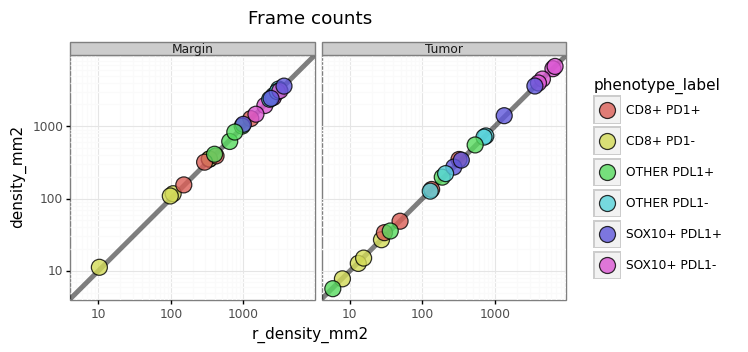

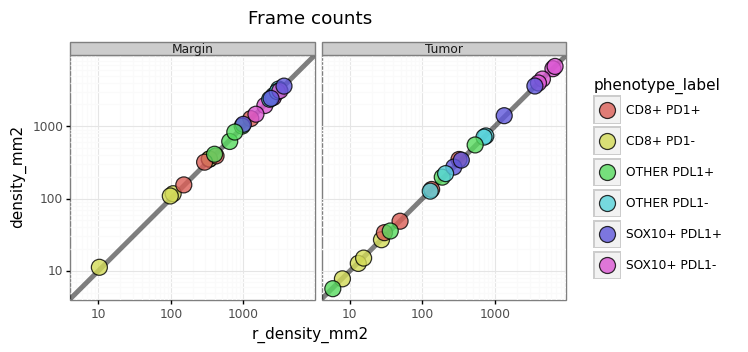

In [3]:
# read R data
infile = os.path.join(base,'frame_counts.csv')
r_frame_counts = pd.read_csv(infile)
thresh = cdf.threshold('SOX10+','PDL1').threshold('CD8+','PD1').threshold('OTHER','PDL1')
frame_counts = thresh.counts().frame_counts()
# compare the R and python
df = r_frame_counts.rename(columns={'density_mm2':'r_density_mm2'}).\
    merge(frame_counts[['sample_name','frame_name','region_label','density_mm2','phenotype_label']],
          on=['sample_name','frame_name','region_label','phenotype_label'],how='outer').fillna(0)
df = df.loc[df['region_label']!='Stroma'] # code doesn't catch stroma
temp = df.copy()
temp['density_mm2'] = temp['density_mm2'].add(1)
temp['r_density_mm2'] = temp['r_density_mm2'].add(1)
g = (ggplot(temp,aes(x='r_density_mm2',y='density_mm2',fill='phenotype_label'))
 + geom_abline(slope=1,alpha=0.5,size=2)
 + geom_point(size=6,alpha=0.8)
 + facet_wrap(['region_label'])
 + theme_bw()
 + theme(aspect_ratio=1)
 + scale_x_log10()
 + scale_y_log10()
 + ggtitle('Frame counts')
)
g.draw()

### Compare per-Sample Count Densities

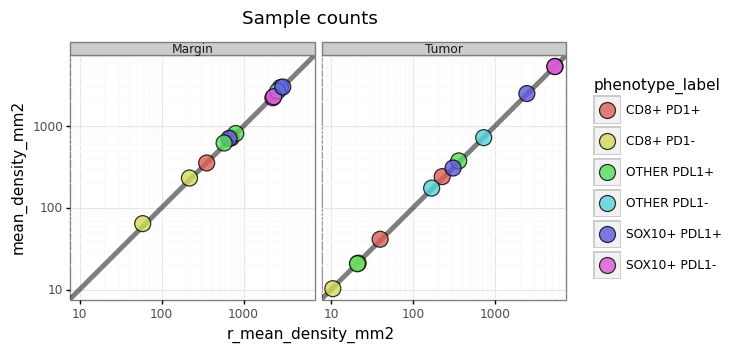

In [4]:
# Compare Sample Counts
plt.show()
# read R data
infile = os.path.join(base,'sample_counts.csv')
r_sample_counts = pd.read_csv(infile)
r_sample_counts
sample_counts = thresh.counts().sample_counts()
# compare the R and python
df = r_sample_counts.rename(columns={'mean_density_mm2':'r_mean_density_mm2'}).\
    merge(sample_counts[['sample_name','region_label','mean_density_mm2','phenotype_label']],
          on=['sample_name','region_label','phenotype_label'],how='outer').fillna(0)
df = df.loc[df['region_label']!='Stroma'] # code doesn't catch stroma
temp = df.copy()
temp['mean_density_mm2'] = temp['mean_density_mm2'].add(1)
temp['r_mean_density_mm2'] = temp['r_mean_density_mm2'].add(1)
g = (ggplot(temp,aes(x='r_mean_density_mm2',y='mean_density_mm2',fill='phenotype_label'))
 + geom_abline(slope=1,alpha=0.5,size=2)
 + geom_point(size=6,alpha=0.8)
 + facet_wrap(['region_label'])
 + theme_bw()
 + theme(aspect_ratio=1)
 + scale_x_log10()
 + scale_y_log10()
 + ggtitle('Sample counts')
)
g.draw()
plt.show()

## Cell-Cell Contacts

### Compare per-Sample cell-cell contact densities

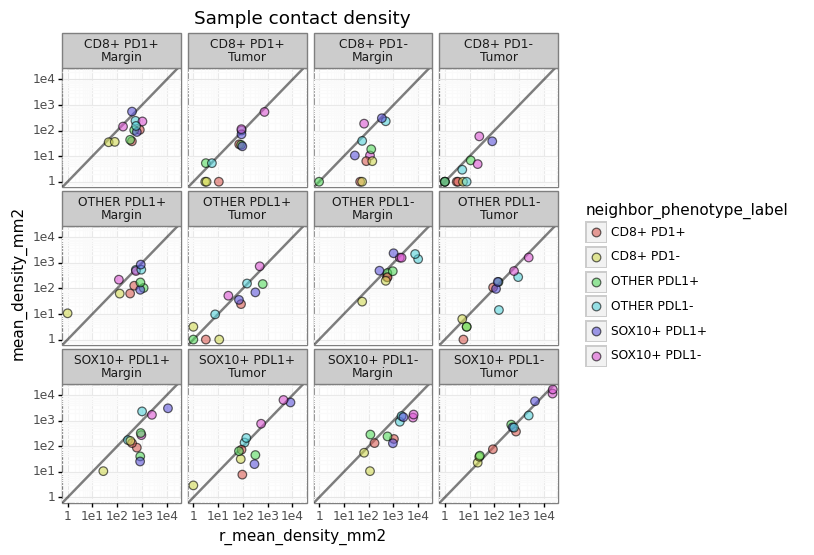

In [5]:
infile = os.path.join(base,'sample_contact_density.csv')
r_sample_contact_density = pd.read_csv(infile)
r_sample_contact_density.head()
sample_contact_density = thresh.contacts().sample_counts()
sample_contact_density = sample_contact_density.loc[sample_contact_density['region_label']!='Stroma']
sample_contact_density.head()
df = r_sample_contact_density.rename(columns={'mean_interaction_density_mm2':'r_mean_density_mm2'}).\
    merge(sample_contact_density[['sample_name',
                                  'region_label',
                                  'mean_density_mm2',
                                  'phenotype_label',
                                  'neighbor_phenotype_label']],
          on=['sample_name','region_label','phenotype_label','neighbor_phenotype_label'],how='outer').fillna(0)
temp = df.copy()
temp['mean_density_mm2'] = temp['mean_density_mm2'].add(1)
temp['r_mean_density_mm2'] = temp['r_mean_density_mm2'].add(1)
g = (ggplot(temp,aes(x='r_mean_density_mm2',y='mean_density_mm2',fill='neighbor_phenotype_label'))
 + geom_abline(slope=1,alpha=0.5,size=1)
 + geom_point(size=3,alpha=0.6)
 + facet_wrap(['phenotype_label','region_label'])
 + theme_bw()
 + theme(aspect_ratio=1)
 + scale_x_log10()
 + scale_y_log10()
 + ggtitle('Sample contact density')
)
g.draw()
plt.show()

### Compare per-Sample cell-cell contact fractions

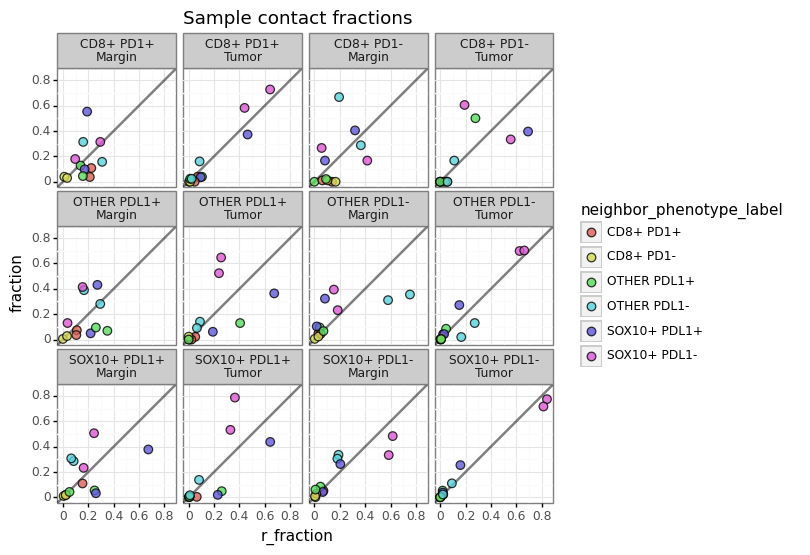

In [6]:
infile = os.path.join(base,'sample_contact_fractions.csv')
r_sample_contact_fractions = pd.read_csv(infile)
sample_contact_fractions = thresh.contacts().sample_counts()
sample_contact_fractions = sample_contact_fractions.loc[sample_contact_fractions['region_label']!='Stroma'].\
    rename(columns={'cumulative_fraction':'fraction'})
df = r_sample_contact_fractions.rename(columns={'fraction':'r_fraction'}).\
    merge(sample_contact_fractions[['sample_name',
                                  'region_label',
                                  'fraction',
                                  'phenotype_label',
                                  'neighbor_phenotype_label']],
          on=['sample_name','region_label','phenotype_label','neighbor_phenotype_label'],how='outer').fillna(0)
temp = df.copy()
#temp = temp.loc[temp['phenotype_label']=='OTHER PDL1-']
g = (ggplot(temp,aes(x='r_fraction',y='fraction',fill='neighbor_phenotype_label'))
 + geom_abline(slope=1,alpha=0.5,size=1)
 + geom_point(size=3,alpha=0.8)
 + facet_wrap(['phenotype_label','region_label'])
 + theme_bw()
 + theme(aspect_ratio=1)
 + ggtitle('Sample contact fractions')
 + xlim(0,0.85)
 + ylim(0,0.85)
)
g.draw()
plt.show()

## Nearest Neighbor 

### Compare per-Sample nearest neighbor distances

⚠️ The consistency of the R scripts use of `NaN` and `0` is a bit suspect here. The intention was for `NaN` to be used when insufficient data based on a minimum number of cells with a phenotype being present.  For plotting purposes, we will plot NaN values as -20 and a maximum of 100um distance.  Here we have switched to use a `minimum_edges` parameter to descide whether or not to include a measurement. The proceedure for how to aggregate the nearest neighbor distances and when to decide if there is enough info could use a closer look.

/Users/jasonw/miniconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:29: PlotnineWarning: Scale for 'x' is already present.
Adding another scale for 'x',
which will replace the existing scale.

/Users/jasonw/miniconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:29: PlotnineWarning: Scale for 'y' is already present.
Adding another scale for 'y',
which will replace the existing scale.

/Users/jasonw/miniconda3/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 20 rows containing missing values.


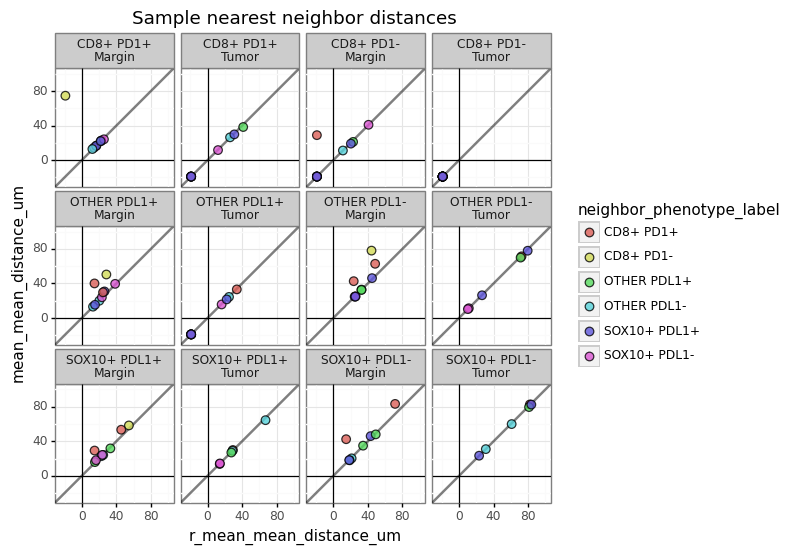

In [7]:
infile = os.path.join(base,'sample_nn.csv')
r_nn = pd.read_csv(infile)
thresh2 = thresh.loc[thresh['region_label']!='Stroma']
nn = thresh2.nearestneighbors().sample_distance(minimum_edges=20)
df = r_nn.rename(columns={'mean_distance_um':'r_mean_mean_distance_um'}).\
    merge(nn[['sample_name',
              'region_label',
              'mean_mean_distance_um',
              'phenotype_label',
              'neighbor_phenotype_label']],
          on=['sample_name','region_label','phenotype_label','neighbor_phenotype_label'],how='outer').fillna(-20)
df=df.loc[df['region_label']!='Stroma']
temp = df.copy()
temp = temp.loc[temp['r_mean_mean_distance_um']!=0]
temp['mean_mean_distance_um'] = temp['mean_mean_distance_um'].add(1)
temp['r_mean_mean_distance_um'] = temp['r_mean_mean_distance_um'].add(1)
g = (ggplot(temp,aes(x='r_mean_mean_distance_um',y='mean_mean_distance_um',fill='neighbor_phenotype_label'))
 + geom_abline(slope=1,alpha=0.5,size=1)
 + geom_point(size=3,alpha=0.8)
 + geom_vline(xintercept=0)
 + geom_hline(yintercept=0)
 + facet_wrap(['phenotype_label','region_label'])
 + theme_bw()
 + theme(aspect_ratio=1)
 + ggtitle('Sample nearest neighbor distances')
 + scale_x_log10()
 + scale_y_log10()
 + xlim(-25,100)
 + ylim(-25,100)
)
g.draw()
plt.show()